# Estimación del amortiguamiento de una señal

En este Notebook se desarrolla el scripting necesario para cargar una señal guardada en un fichero de texto plano (.txt), limpiarla (detrend) y estimar su amortiguamiento por envolvente exponencial. 

_Creado por Álvaro Magdaleno - ITAP/EII - Universidad de Valladolid_

### Carga de los paquetes necesarios

In [126]:
import numpy as np
import scipy.signal as sig
import scipy.stats as sts
import matplotlib.pyplot as plt

### Carga del fichero

In [127]:
data = np.loadtxt('TestDec.txt')

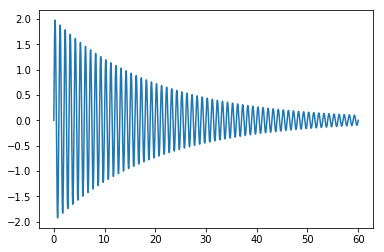

In [128]:
plt.plot(data[:,0], data[:,1])

### Detrend (media y tendencia lineal)

In [129]:
data[:,1] = sig.detrend(data[:,1])

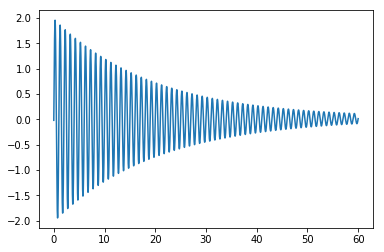

In [130]:
plt.plot(data[:,0], data[:,1])

### Búsqueda de los picos

In [131]:
ind = sig.find_peaks_cwt(data[:,1], np.arange(1,10))

El segundo argumento de esta función es una serie de valores sobre la que se operan unos "wavelets" para filtrar la señal, de algún modo. En el ejemplo de utilización usan los números del 1 al 10, por eso están ahí. 

Sucede que el último punto, si tiene pendiente positiva, siempre lo detecta como "máximo", aunque realmente no lo sea. Por eso, nos quedamos con todos menos con el último.

In [132]:
ind = ind[:-1]

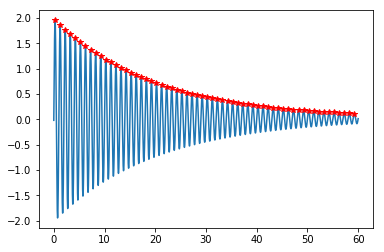

In [133]:
plt.plot(data[:,0], data[:,1], data[ind,0], data[ind,1], 'r*')

### Conversión al espacio logarítmico y ajuste a una recta

Se trata de ajustar las crestas identificadas a una función del siguiente estilo: $Y(t) = A\exp(-\omega \xi t)$, donde $\omega$ es la frecuencia natural en rad/s (conocida) y $\xi$ es el factor de amortiguamiento crítico que se desea obtener. Para ello, Se toman logaritmos a ambos lados y, tras un poco de manipulación, se obtiene la siguiente recta:
$$\ln(Y) = \ln(A) - \omega\xi t$$
La pendiente de esta recta es negativa e igual al producto $\omega\xi$. Tras su identificación, se divide por la frecuencia natural $\omega$ y se obtiene el amortiguamiento buscado.

In [134]:
Y = np.log(data[ind,1])
tY = data[ind,0] # Los puntos temporales asociados a las crestas, para la regresión

Y aquí va la regresión lineal:

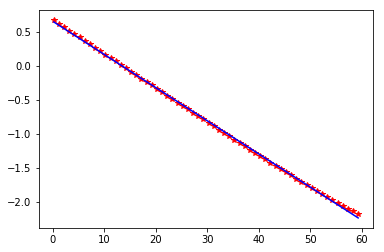

In [135]:
m, n, r, p, st = sts.linregress(tY, Y)
plt.plot(tY, Y, 'r*', tY, m*tY + n, 'b-')

Se establece el valor de la frecuencia natural y se estima el amortiguamiento:

In [136]:
w = 2*np.pi*1

xi = -m/w
print('El amortiguamiento es {:.2}%'.format(100*xi))

El amortiguamiento es 0.78%
